# Linear Regression

**Linear regression** is an approach to modeling the relationship between two (**simple linear regression**) or more (**multiple linear regression**) variables.

Here are the linear regression equations:

Simple Linear Regression: `y = b0 + b1x1`
(one feature)

Multiple Linear Regression: `y = b0 + b1x1 + b2x2 + ... bnxn`
(multiple features)

Polynomial Linear Regression: `y = b0 + b1x1 + b2x1^2 + ... bnx1^n`
(one feature, nonlinear)

- `y` is the target variable
- `x1, ..., xn` are the features. 
- `b0, ... bn` are the weights
- `n` is the number of observations

Linear regression can be used to make simple predictions such as exam scores based on the number of hours studied, employee salary based on years of experience, etc.


If the data points were on the line `y = β0x + β1`, the parameters β0, β1 would satisfy the equations:

`Predicted y-value = Observed y-value`

`β0 + β1x1 = y1`

`β0 + β1x2 = y2`

...

`β0 + β1xn = yn`

We can write this system as X**β** = **y**. 

- If the data points don't lie on a line, then there are no parameters β0, β1 for which the predicted y-values in X**β** equal the observed y values in **y**. 
- X**β** = **y** has no solution, but we can find an approximate solution (the line that is best fit to the data).
- Given some data with a linear relationship `y = β0x + β1`, a linear regression finds the line that is best fit to the data. 
- The values on this line will correspond to the predicted values of `y` for the corresponding `x`.
- The **residuals** are the distances between the predicted `y` values and the actual `y` values.
- The usual choice for measuring how close the line is to the data is to add the squares of the residuals.
- The **least-squares line** is the line that **minimizes the sum of the squares of the residuals**.
- The coefficients β0, β1 of the linear are called (linear) **regression coefficients**.
- The square of the distance between the vectors `Xβ` and `y` is precisely the sum of the squares of the residuals.
- Statisticians usually introduce a residual vector: `y =  Xβ + ε`.
- Any equation of the form `y =  Xβ + ε` is called a **linear model**.

To perform a linear regression solving for `β0` and `β1` in the equation `y = β0 + β1x` by multiplying both sides by `X^T`.

`X^T y = (X^T X)β`


## How to perform a linear regression by hand

Thus the least squares solution is y = 0.28571428571428636 + 0.3571428571428572x


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


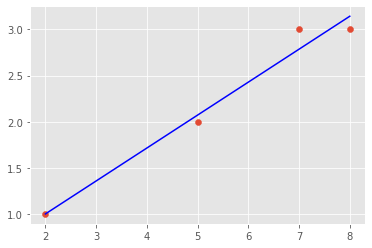

In [79]:
import numpy as np
# Example: Perform a linear regression on the following data: (2, 1), (5, 2), (7, 3), (8, 3) (Note this is different data than the example above)
X = np.array([[1, 2], [1, 5], [1, 7], [1, 8]])
y = np.array([1, 2, 3, 3])

# For the least squares solution, we need to find the normal equations. Multiply both sides of Xβ = y by X^T and solve for β: (X^T X)β = X^T y
β = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(f"Thus the least squares solution is y = {β[0]} + {β[1]}x")

# We can also use the built-in least squares function in numpy
β = np.linalg.lstsq(X, y)[0]

# Plot the data and the line
import matplotlib.pyplot as plt
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], X.dot(β), color='blue')
plt.show()

## Simple linear regression

In [49]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

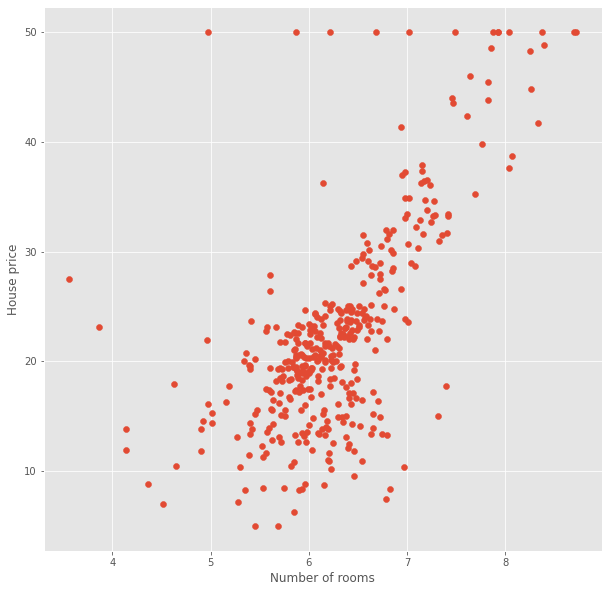

In [50]:
# Plotting the data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
plt.scatter(train_data[:, 5], train_targets)
plt.xlabel('Number of rooms')
plt.ylabel('House price')
plt.show()

In [51]:
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [59]:
from sklearn import linear_model

# Build the model
model = linear_model.LinearRegression()

# Train the model on number of rooms
model.fit(train_data[:, 5].reshape(-1, 1), train_targets)

# Evaluate the model
model.score(test_data[:, 5].reshape(-1, 1), test_targets)

0.5561567875790349

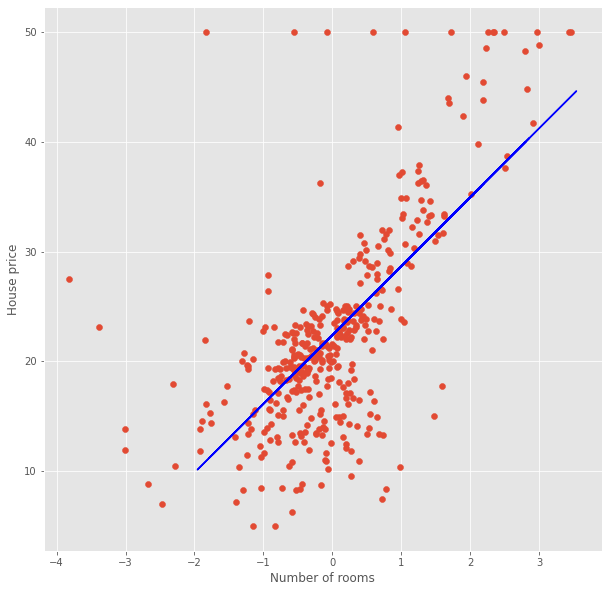

In [58]:
# Plotting the predictions
plt.figure(figsize=(10, 10))
plt.scatter(train_data[:, 5], train_targets)
plt.plot(test_data[:, 5], model.predict(test_data[:, 5].reshape(-1, 1)), color='blue')
plt.xlabel('Number of rooms')
plt.ylabel('House price')
plt.show()

## Multiple Linear Regression

In [68]:
from sklearn import linear_model

# Build the model
model = linear_model.LinearRegression()

# Train the model on all features
model.fit(train_data, train_targets)

# Evaluate the model
model.score(test_data, test_targets)

0.7213535934621553

## Polynomial Linear Regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures

# Build the model
poly = PolynomialFeatures(degree=2)
poly_train_data = poly.fit_transform(train_data[:, 5].reshape(-1, 1))
poly_test_data = poly.fit_transform(test_data[:, 5].reshape(-1, 1))
model = linear_model.LinearRegression()

# Fit the model
model.fit(poly_train_data, train_targets)

# Evaluate the model
model.score(poly_test_data, test_targets)


0.47817778262743393

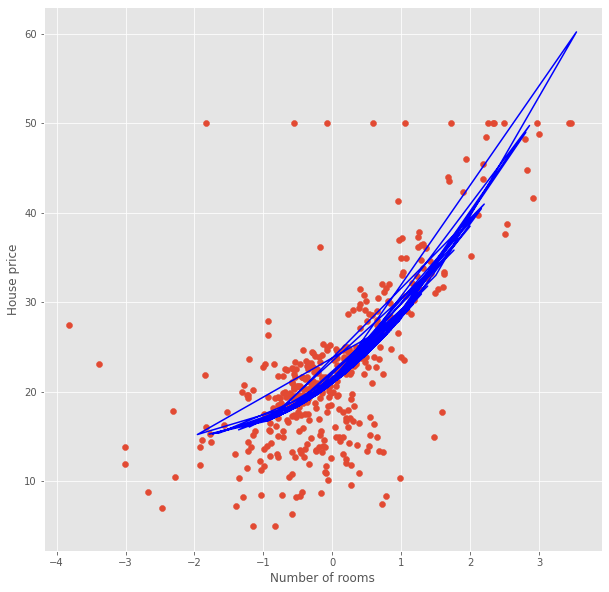

In [65]:
# Plotting the predictions
plt.figure(figsize=(10, 10))
plt.scatter(train_data[:, 5], train_targets)
plt.plot(test_data[:, 5], model.predict(poly_test_data), color='blue')
plt.xlabel('Number of rooms')
plt.ylabel('House price')
plt.show()

## Multiple Polynomial Linear Regression

In [70]:
# Multiple polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Build the model
poly = PolynomialFeatures(degree=2)
poly_train_data = poly.fit_transform(train_data)
poly_test_data = poly.fit_transform(test_data)
model = linear_model.LinearRegression()

# Fit the model
model.fit(poly_train_data, train_targets)

# Evaluate the model
model.score(poly_test_data, test_targets)

0.8232631777841735